In [1]:
%matplotlib inline
from pylab import *

import detectorgeometry as geom
reload(geom)

import detectorgeometry_trap as geom_trap
reload(geom_trap)

import detectorgeometry_071719 as geom_new
reload(geom_new)

<module 'detectorgeometry_071719' from 'detectorgeometry_071719.pyc'>

In [ ]:
h = 35.5 #km
R = 6356. # km
theta_view = radians(1) #degrees
N = 500000 # number of samples

theta_src = radians(0.8)
area = geom_trap.Area(theta_src,h,R,theta_view, N)
A, e_phi, e_theta, view_angle, exit_angle, norm, e_dot= area.event_retention()
# earth_t_min, earth_t_max, phi_E_min, phi_E_max = area.earth_patch(area.t_src,area.phi_src, area.th_v)
# r_x, r_y, r_z = area.coords(area.t_src, area.phi_src + np.pi) 
# t_e,phi_e = area.earth_locs(earth_t_min, earth_t_max, phi_E_min, phi_E_max)
# e_x,e_y,e_z = area.coords(t_e,phi_e)
# dot = area.dot_prod(e_x,e_y,e_z,r_x, r_y,r_z)
# view_angle,exit_angle, flight_path = area.view_angle_dist_det(e_x,e_y,e_z,r_x, r_y,r_z)


In [ ]:
#print A, e_phi, view_angle
plt.scatter(degrees(e_phi), degrees(e_theta),s=1)
plt.xlabel("Earth phi (deg)")
plt.ylabel("Earth theta (deg)")
plt.axhline(degrees(min(e_theta)))
plt.axhline(degrees(max(e_theta)))
plt.axvline(degrees(min(e_phi)))
plt.axvline(degrees(max(e_phi)))

print radians(max(degrees(e_phi))-min(degrees(e_phi)))
print radians(max(degrees(np.unwrap(e_theta)))-min(degrees(np.unwrap(e_theta))))
            

# plt.scatter(e_phi, e_theta,s=1)
# plt.xlabel("Earth phi (rad)")
# plt.ylabel("Earth theta (rad)")
# plt.axhline(min(e_theta))
# plt.axhline(max(e_theta))
# plt.axvline(min(e_phi))
# plt.axvline(max(e_phi))

plt.title(str(round(degrees(theta_src),1))+" Trapezoid")
#plt.ylim(0.8*min(degrees(samp_t_e) ),1.2*max(degrees(samp_t_e) ))

plt.show()



In [2]:
h = 35.5 #km
R = 6356. # km
theta_view = radians(1) #degrees
N = 10000000 # number of samples
start = 0 # minimum source declination in degrees
end = 90 # maximum source declination in degrees
steps= 90 # divisions indeclination used to generate plot

areas1=[]
areas2=[]
for j in range(0,steps):
    theta = radians(start+(end-start)*float(j)/steps)
    
    area1 = geom.Area(theta,h,R,theta_view, N)
    A1 = area1.degree_eff_area()
    
    area2 = geom_trap.Area(theta,h,R,theta_view, N)
    A2, phi_e, theta_e, view_angle, exit_angle, norm, e_dot= area2.event_retention()
#     earth_t_min, earth_t_max, phi_E_min, phi_E_max = area2.earth_patch(area2.t_src,area2.phi_src, area2.th_v)
#     earth_t =area2.thetaE_nadir(theta)
#     print np.arcsin((R+h) * np.sin(theta) / R)
#     print 2*np.pi* (h * np.tan(theta)) 
#     print (2*np.pi*np.sin(earth_t)*R)
#     print earth_t , earth_t_min, earth_t_max, phi_E_min, phi_E_max
    
    areas1.append(A1)
    areas2.append(A2)
    print degrees(theta),A1, A2
    print "   "


detectorgeometry_trap.py:54: RuntimeWarning: invalid value encountered in double_scalars
  arg2 = (self.h * np.tan(theta_src)) /(4*np.pi*np.sin(earth_t)*self.R)


0.0 1.2688658649302766 1.8092023400560937
   
1.0 1.832524455888485 1.9208221761104305
   
2.0 0.9862874670127895 1.4074718949026868
   
3.0000000000000004 0.9855269831217837 1.3311592980797267
   
4.0 1.125098777797962 1.2986636797422146
   
5.0 0.7022150249925586 1.284241275379466
   
6.000000000000001 0.84122512810906 1.2745391248732982
   
7.0 1.399225806883572 1.2731221884767898
   
8.0 1.395975181645745 1.2694895266719448
   
9.0 0.8353755799969743 1.2720183019187685
   
10.0 1.5270094650323223 1.2816509256294657
   
11.0 1.3836540267641744 1.2836378966161737
   
12.000000000000002 1.9301604071443963 1.2929350419871806
   
13.0 0.961317161384051 1.3035035518792788
   
14.0 1.0939960019576411 1.3041576994145336
   
14.999999999999998 1.3612666243904255 1.3146838088732038
   
16.0 0.9482277344930793 1.333966193818456
   
17.0 1.0780306110968165 1.3365263124701146
   
18.0 1.4740686001844368 1.3598466870087682
   
19.0 0.7992857649128212 1.3626599985943935
   
20.0 1.059064257744533

detectorgeometry_trap.py:35: RuntimeWarning: invalid value encountered in arcsin
  arg = np.arcsin((self.R+self.h) * np.sin(nadir) / self.R)


84.0 87.22604940290708 99.26379230728442
   
85.0 0.0 0.0
   
86.0 0.0 0.0
   
87.0 0.0 0.0
   
88.0 0.0 0.0
   
89.0 0.0 0.0
   


[]

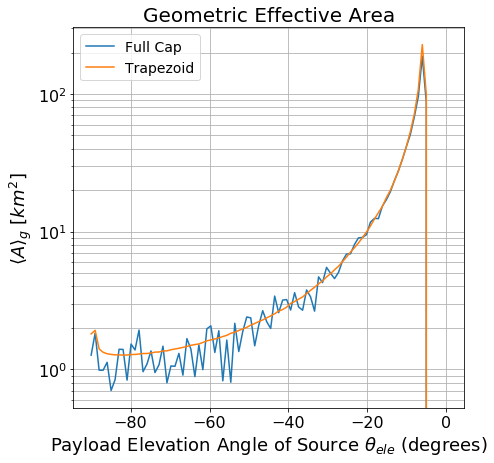

In [3]:
# Creating a plot for the full range of possible source declinations 
fig = plt.figure(figsize=(7,7))
ax = plt.axes()
x = np.linspace(start-90,end-90,steps)

ax.plot(x, areas1)
ax.plot(x, areas2)
    
horizon = degrees(np.arcsin(R / (R+h)))-90
#plt.xlim(-10,0)  
legend = ax.legend(["Full Cap", "Trapezoid"], fontsize=14)
plt.xlabel("Payload Elevation Angle of Source "+r'$\theta_{ele}$'+" (degrees)", fontsize=18)
plt.ylabel(r'$\langle A \rangle_g$'+" "+r'$[km^2]$', fontsize=18)
plt.title("Geometric Effective Area", fontsize=20)
plt.setp(legend.get_title(),fontsize='x-large')
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.grid(True,which='both')
plt.semilogy()